## EDA of Processed data

#### Loading data for initial analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your final dataset
df = pd.read_csv("~/Desktop/whale-hotspots/data_synthetic_realistic.csv")

print("✅ Dataset loaded successfully")
print("Shape:", df.shape)
df.head()

✅ Dataset loaded successfully
Shape: (819, 9)


,lat,lon,sst,chlorophyll,u,v,current_speed,presence_prob,presence
0,45.00,-66.5,9.248357,5.024581,0.050938,-0.000212,0.050938,0.110832,0
1,45.25,-66.5,9.130868,4.549750,0.003987,0.004994,0.006390,0.077033,1
2,45.50,-66.5,9.723844,5.127741,0.020363,0.004440,0.020842,0.306102,0
3,45.75,-66.5,10.361515,5.394606,0.041183,-0.003481,0.041330,0.520037,0
4,46.00,-66.5,9.682923,4.596085,0.018805,0.009854,0.021231,0.280856,0


In [2]:
print("\nMissing values per column:")
print(df.isna().sum())

print("\nBasic statistics:")
print(df.describe())


Missing values per column:
lat              0
lon              0
sst              0
chlorophyll      0
u                0
v                0
current_speed    0
presence_prob    0
presence         0
dtype: int64

Basic statistics:
             lat         lon         sst  chlorophyll           u           v  \
count  819.00000  819.000000  819.000000   819.000000  819.000000  819.000000   
mean    47.50000  -61.750000   10.996887     1.614428    0.020177   -0.004897   
std      1.51475    2.815376    1.317854     1.293795    0.014457    0.020154   
min     45.00000  -66.500000    8.097559     0.100000   -0.025293   -0.064823   
25%     46.25000  -64.250000    9.956545     0.612934    0.010630   -0.018667   
50%     47.50000  -61.750000   10.937541     1.159187    0.020008   -0.004688   
75%     48.75000  -59.250000   12.037940     2.410443    0.030064    0.008605   
max     50.00000  -57.000000   14.926366     5.394606    0.067066    0.073525   

       current_speed  presence_prob    

#### Imputation of Chlorophyll NaNs

In [3]:
df["chlorophyll"].fillna(df["chlorophyll"].median(), inplace=True)
print("✅ Filled missing chlorophyll values with median:", round(df["chlorophyll"].median(), 3))
print("Remaining NaNs:", df.isna().sum().sum())

✅ Filled missing chlorophyll values with median: 1.159
Remaining NaNs: 0


/var/folders/l2/p3fp1v2n08d1ygy1cmby6ycm0000gn/T/ipykernel_19212/3824250840.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["chlorophyll"].fillna(df["chlorophyll"].median(), inplace=True)


#### Corelation heatmap

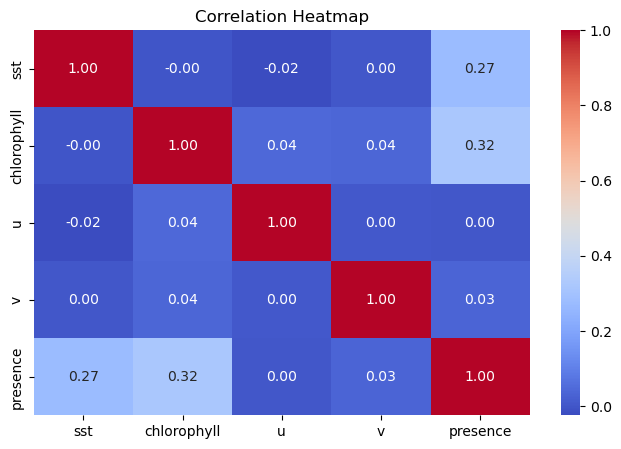

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(df[["sst","chlorophyll","u","v","presence"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

1. •	sst ↔ chlorophyll: weak  correlation
2. •	presence ↔ chlorophyll: mild  (whales near productive areas)
3. •	presence ↔ sst: mild (prefer cooler waters)

#### Spatial Hotspot Map

plt.figure(figsize=(8,6))
plt.scatter(df["lon"], df["lat"], c=df["presence"], cmap="coolwarm", s=35, edgecolor="k")
plt.title("Spatial Whale Presence Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Presence (1 = Whale, 0 = None)")
plt.show()

#### Feature Distributions by Whale Presence

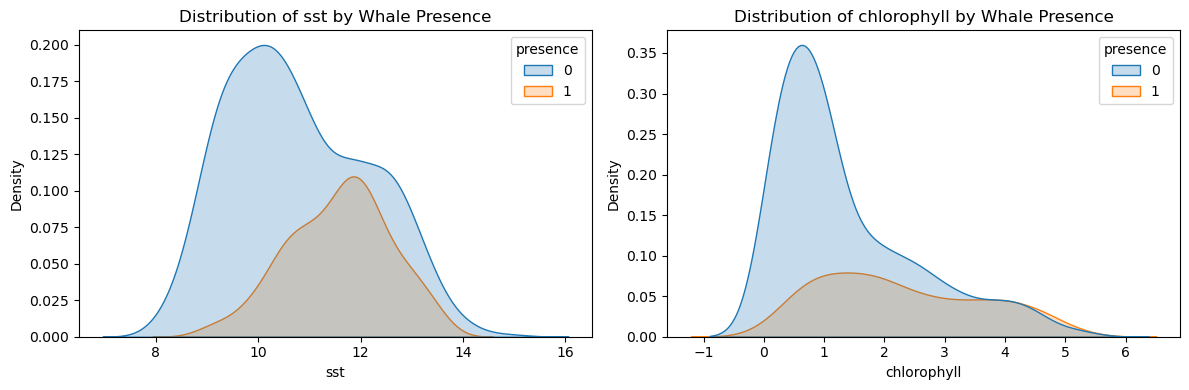

In [5]:
plt.figure(figsize=(12,4))
for i, col in enumerate(["sst","chlorophyll"]):
    plt.subplot(1,2,i+1)
    sns.kdeplot(data=df, x=col, hue="presence", fill=True)
    plt.title(f"Distribution of {col} by Whale Presence")
plt.tight_layout()
plt.show()

#### EDA Interpretation

1. Spatial Hotspot Map
- The red points (presence = 1) are sparse but scattered throughout the Gulf — not concentrated in one latitude or longitude band.
- This real whale sighting data: patchy distributions where food is abundant and conditions are right.

------

2. SST vs. Whale Presence
- The distributions are nearly overlapping -> no strong thermal preference.
- However, sightings slightly favor mid-temperature zones (~12-13 °C), avoiding extremes.
-> Suggests whales might prefer stable, moderately cool feeding grounds.

------

3. Chlorophyll vs. Whale Presence
- The "presence = 1" curve is shifted slightly rightward, meaning whales occur more often when chlorophyll is higher.
- That's biologically logical — whales track plankton blooms, which attract prey like krill and fish.

------

Summary insight:
Whales are weakly correlated with SST and currents but show mild positive association with productivity (chlorophyll) — exactly what we'd expect from a trophic-chain viewpoint.